In [66]:
import pandas as pd
import numpy as np
import pandas_profiling 
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline  

In [59]:
ROOT = '../'

sys.path.append(os.path.join(ROOT, '04 select feature and build model'))
DATA_PATH = os.path.join(os.path.join(ROOT, '04 select feature and build model'), 'data')
CLEANED_FACTOR_PATH = os.path.join(ROOT, '03 data process')
from load_data import load_data, plot_rts
windADf = load_data(DATA_PATH + '/881001.csv')
indexClose = windADf.loc[:, ['date', 'close']].set_index('date')
indexClose.columns.name = ''
rawDf = pd.read_pickle(os.path.join(CLEANED_FACTOR_PATH, 'cleanedFactor.pkl'))

In [206]:
# df = pd.read_pickle('../00 data/result/rawDf.pkl')
# profile = pandas_profiling.ProfileReport(df)
# profile.to_file(outputfile="inputDataReport.html")


In [207]:
y_pred = pd.read_pickle('../00 data/result/outputPrediction.pkl').astype(bool)
y_indexClose = indexClose[y_pred.index[0]:]

In [208]:
windAReturn = indexClose.pct_change().shift(-1).rename(columns = {'close':'return'})
windACumprod = (windAReturn+1).cumprod()

In [209]:
longDay = y_pred.index[y_pred]
strategyLongReturn = windAReturn.loc[longDay]
strategyLongCumprod = (strategyLongReturn+1).cumprod()

In [210]:
shortDay = y_pred.index[~y_pred]
strategyLongShortReturn = windAReturn.loc[y_pred.index]
strategyLongShortReturn.loc[shortDay] = strategyLongShortReturn.loc[shortDay]*-1
strategyLongShortCumprod = (strategyLongShortReturn+1).cumprod()

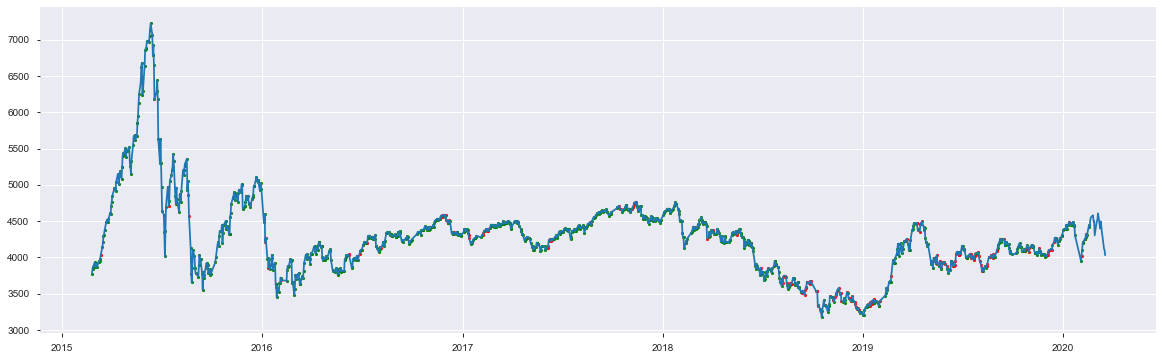

In [211]:
plt.figure(figsize = (20, 6))
plt.plot(y_indexClose.index, y_indexClose)
plt.scatter(shortDay, y_indexClose.loc[shortDay],color = 'red',s = 8)
plt.scatter(longDay, y_indexClose.loc[longDay],color = 'green',s = 8)
plt.show()



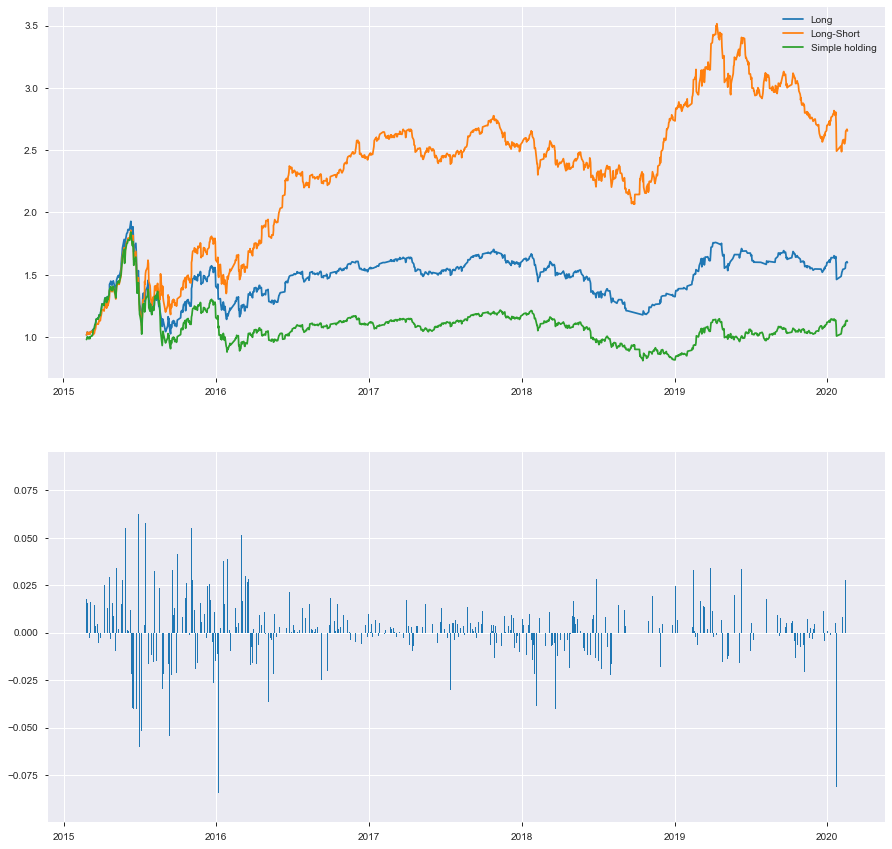

In [212]:
plt.figure(figsize = (15, 15))
plt.subplot(211)
plt.plot(strategyLongCumprod.index, strategyLongCumprod, label = 'Long')
plt.plot(strategyLongShortCumprod.index, strategyLongShortCumprod, label = 'Long-Short')
plt.plot(windACumprod.loc[y_pred.index].index, windACumprod.loc[y_pred.index], label = 'Simple holding')
plt.legend()
plt.subplot(212)
plt.bar(strategyLongReturn.index, strategyLongReturn['return'])


plt.show()